In [107]:
# DATA LOAD

import pandas as pd

no_tmp = pd.read_csv('jeongen/노무현.csv')
no_npp = pd.read_csv('jeongen/노무현_국힘.csv')

no = pd.concat([no_tmp,no_npp],ignore_index = True)

moon_tmp = pd.read_csv('jeongen/문재인.csv')
moon_npp = pd.read_csv('jeongen/문재인_국힘.csv')
moon = pd.concat([moon_tmp,moon_npp],ignore_index = True)

park_tmp = pd.read_csv('jeongen/박근혜.csv')
park_npp = pd.read_csv('jeongen/박근혜_국힘.csv')
park = pd.concat([park_tmp,park_npp], ignore_index = True)


yoon = pd.read_csv('jeongen/윤석열.csv')

lee_tmp = pd.read_csv('jeongen/이명박.csv')
lee_npp = pd.read_csv('jeongen/이명박_국힘.csv')
lee = pd.concat([lee_tmp,lee_npp],ignore_index = True)



In [108]:
no.target.value_counts()

국민의힘    7665
민주당     7078
Name: target, dtype: int64

In [109]:
moon.target.value_counts()

국민의힘    14126
민주당      9177
Name: target, dtype: int64

In [110]:
park.target.value_counts()

민주당     7421
국민의힘    5681
Name: target, dtype: int64

In [111]:
yoon.target.value_counts()

국민의힘    3733
민주당     3659
Name: target, dtype: int64

In [112]:
lee.target.value_counts()

민주당     12140
국민의힘     9648
Name: target, dtype: int64

In [113]:
# tfidf + wordcloud 함수 생성

def make_wordcloud(npp,tmp):
    npp_tfidf_vectorizer = TfidfVectorizer(max_features = 1000,stop_words = stop_words)
    tmp_tfidf_vectorizer = TfidfVectorizer(max_features = 1000,stop_words = stop_words)
    # matrix 생성
    npp_matrix = npp_tfidf_vectorizer.fit_transform(npp)
    tmp_matrix = tmp_tfidf_vectorizer.fit_transform(tmp)

    npp_feature_names = npp_tfidf_vectorizer.get_feature_names_out()
    tmp_feature_names = tmp_tfidf_vectorizer.get_feature_names_out()

    npp_scores = npp_matrix.toarray()
    tmp_scores = tmp_matrix.toarray()


    # Calculate the average TF-IDF scores
    npp_avg_tfidf_scores = npp_scores.mean(axis=0)
    tmp_avg_tfidf_scores = tmp_scores.mean(axis=0)

    # 폰트 설정
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    # fontprop = fm.FontProperties(fname=font_path, size=18)

    # Create word clouds
    npp_wordcloud = WordCloud(max_words = 50,width=800, height=400, background_color='white',font_path=font_path, colormap='Reds').generate_from_frequencies(dict(zip(npp_feature_names, npp_avg_tfidf_scores)))
    tmp_wordcloud = WordCloud(max_words = 50,width=800, height=400, background_color='white',font_path=font_path,colormap='Blues').generate_from_frequencies(dict(zip(tmp_feature_names, tmp_avg_tfidf_scores)))

    
    
    
    npp_topwords_indices = npp_scores.mean(axis=0).argsort()[::-1][:100]
    tmp_topwords_indices = tmp_scores.mean(axis=0).argsort()[::-1][:100]

    npp_top_words = [(npp_feature_names[idx], npp_scores.mean(axis=0)[idx]) for idx in npp_topwords_indices]
    tmp_top_words = [(tmp_feature_names[idx], tmp_scores.mean(axis=0)[idx]) for idx in tmp_topwords_indices]


    print("NPP'S Top 100 Words with High TF-IDF Scores:")
    for word, score in npp_top_words:
        print(f"{word}: {score:.4f}")

    print("\nTMP'S Top 100 Words with High TF-IDF Scores:")
    for word, score in tmp_top_words:
        print(f"{word}: {score:.4f}")
    # Plot the word clouds

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(npp_wordcloud, interpolation='bilinear')
    plt.title('NPP TF-IDF Word Cloud')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(tmp_wordcloud, interpolation='bilinear')
    plt.title('TMP TF-IDF Word Cloud')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## 노무현
1. 국가보안법 폐지파동 : ['법사위', '국가보안법', '국보', '특별법', '상정', '사립학교', '의총', '심의', 'FTA', '예산안']
2. 남북 관계 : ['교류', '이라크', '개성', '정상회담', '양국', '동맹', '핵실험', '한일', '대사', '공단']

## 1. 국가보안법 폐지 파동

In [105]:
# 결측치 
no.isnull().sum()


In [114]:
no['content3'] = no['content2'].str.split(" ")
no.head()
no = no[['content','target','content2','content3']]

In [115]:
# 토픽 모델링 결과

keywords_1 =  ['법사위', '국가보안법', '국보', '특별법', '상정', '사립학교', '의총', '심의', 'FTA', '예산안']
keywords_2 =  ['교류', '이라크', '개성', '정상회담', '양국', '동맹', '핵실험', '한일', '대사', '공단']


In [117]:
# 2개이상 매칭되는 정당간행물을 찾았을 때

no_1 = no[no['content3'].apply(lambda text_list: isinstance(text_list, list) and sum(keyword in text_list for keyword in keywords_1) >= 3)]
no_2 = no[no['content3'].apply(lambda text_list: isinstance(text_list, list) and sum(keyword in text_list for keyword in keywords_2) >= 3)]
print(no_1.shape[0],"개의 정당 간행물 발견")


492 개의 정당 간행물 발견


In [118]:
no_1.target.value_counts()

민주당     298
국민의힘    194
Name: target, dtype: int64

In [41]:
# stop_Word 동일하게 적용

stop_words = ['.','하다','있다','되다','없다','않다','아니다','이다','받다','되어다','보다','이렇다','그렇다','후보','대통령','우원식','정동영','한나라당','우크라이나','의원','이명박','윤석열','이재명','정세균','박근혜']


NPP'S Top 100 Words with High TF-IDF Scores:
문제: 0.0854
국민: 0.0843
국회: 0.0718
정부: 0.0635
생각: 0.0631
법안: 0.0590
열린우리당: 0.0544
국보: 0.0497
처리: 0.0497
관련: 0.0479
여당: 0.0478
때문: 0.0433
예산: 0.0415
합의: 0.0413
위원회: 0.0404
오늘: 0.0367
사학: 0.0365
정치: 0.0358
경제: 0.0357
폐지: 0.0353
국가: 0.0341
말씀: 0.0340
입장: 0.0339
대표: 0.0339
북한: 0.0337
논의: 0.0337
이야기: 0.0330
정책: 0.0327
국가보안법: 0.0326
부분: 0.0314
정권: 0.0312
위원: 0.0310
내용: 0.0308
국정: 0.0308
특검: 0.0307
통과: 0.0303
야당: 0.0301
상임위: 0.0301
개정: 0.0300
가지: 0.0293
이번: 0.0292
개정안: 0.0285
선거: 0.0275
예정: 0.0273
민생: 0.0273
위원장: 0.0270
회의: 0.0269
조사: 0.0264
교육: 0.0264
여야: 0.0263
반대: 0.0261
운영: 0.0255
상정: 0.0255
법사위: 0.0251
인권: 0.0250
의견: 0.0245
수사: 0.0242
대책: 0.0240
필요: 0.0240
정기: 0.0239
국감: 0.0238
사람: 0.0236
제출: 0.0236
원내대표: 0.0234
발언: 0.0232
검찰: 0.0231
감사: 0.0230
회담: 0.0230
주장: 0.0229
언론: 0.0228
개혁: 0.0228
장관: 0.0228
요구: 0.0225
상황: 0.0225
사실: 0.0224
심의: 0.0223
경우: 0.0223
노무현: 0.0218
협상: 0.0214
노력: 0.0213
결정: 0.0212
책임: 0.0211
법률: 0.0209
추진: 0.0208
사건: 0.0207
활동: 0

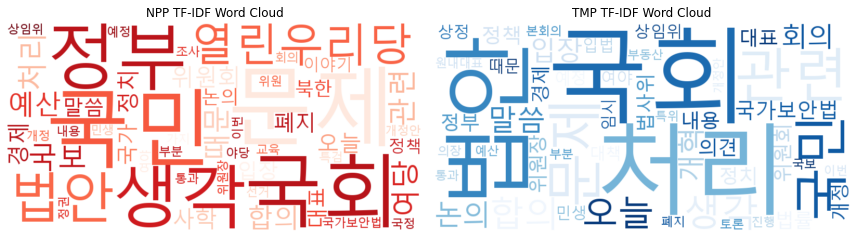

In [121]:
npp_no_1 = no_1[no_1['target']=='국민의힘'].content2
tmp_no_1 = no_1[no_1['target']=='민주당'].content2

make_wordcloud(npp_no_1,tmp_no_1)


## 2. 남북관계



In [124]:
no_2.target.value_counts()

민주당     260
국민의힘    170
Name: target, dtype: int64

NPP'S Top 100 Words with High TF-IDF Scores:
북한: 0.1207
국민: 0.0960
문제: 0.0853
정부: 0.0808
핵실험: 0.0600
정책: 0.0582
생각: 0.0554
노무현: 0.0513
안보: 0.0482
대북: 0.0450
정권: 0.0447
대표: 0.0432
일본: 0.0417
관계: 0.0406
대사: 0.0404
한국: 0.0403
미국: 0.0394
이야기: 0.0383
국회: 0.0367
말씀: 0.0366
관련: 0.0350
지원: 0.0344
때문: 0.0339
이번: 0.0338
장관: 0.0338
열린우리당: 0.0337
국가: 0.0332
정상회담: 0.0331
책임: 0.0329
경제: 0.0319
정치: 0.0316
국제: 0.0315
외교: 0.0312
여당: 0.0310
개성: 0.0296
발언: 0.0293
양국: 0.0287
상황: 0.0283
회담: 0.0282
금강산: 0.0278
중단: 0.0274
인사: 0.0274
제재: 0.0274
국정: 0.0270
공단: 0.0269
노력: 0.0266
한일: 0.0263
대선: 0.0262
오늘: 0.0261
의장: 0.0259
사람: 0.0258
입장: 0.0249
평화: 0.0247
한반도: 0.0247
공조: 0.0239
사회: 0.0238
총리: 0.0236
위원: 0.0235
사업: 0.0233
관광: 0.0231
남북: 0.0231
부분: 0.0230
포용: 0.0229
사실: 0.0228
선거: 0.0227
청와대: 0.0225
가지: 0.0225
합의: 0.0225
최고: 0.0221
필요: 0.0219
방문: 0.0218
내용: 0.0217
주장: 0.0215
촉구: 0.0213
라고: 0.0212
참여: 0.0209
논의: 0.0207
위원장: 0.0207
전쟁: 0.0206
협력: 0.0205
사건: 0.0205
사태: 0.0205
나라: 0.0204
해결: 0.0202
동맹: 0.0201
psi: 0.0

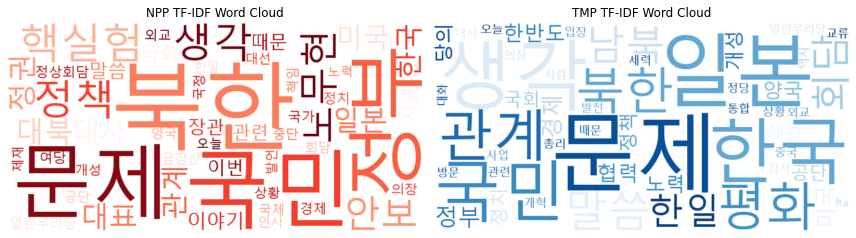

In [123]:
# npp, tmp 나누기
npp_no_2 = no_2[no_2['target']=='국민의힘'].content2
tmp_no_2 = no_2[no_2['target']=='민주당'].content2

make_wordcloud(npp_no_2,tmp_no_2)

# 윤석열
1. 후쿠시마 오염수 방류 논란 : [후쿠시마, 괴담, 방류, 과학, 수산물, 보고서, 해양, 방사능, 원전, 바다]
2. 이상민 장관 탄핵 소추 (이태원 참사) : [이상민, 탄핵, 해임, 책임자, 안부, 안전부, 시행령, 구청장, 용산, 건의안]

In [125]:
yoon.target.value_counts()

국민의힘    3733
민주당     3659
Name: target, dtype: int64

In [126]:
yoon.isnull().sum()

Unnamed: 0    0
content       0
target        0
content2      0
content3      0
dtype: int64

In [127]:
keywords_1 =  ['후쿠시마', '괴담', '방류', '과학', '수산물', '보고서', '해양', '방사능', '원전', '바다']
keywords_2 =  ['이상민', '탄핵', '해임', '책임자', '안부', '안전부', '시행령', '구청장', '용산', '건의안']



In [128]:
yoon_1 = yoon[yoon['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_1) >= 3)]

print(yoon_1.shape[0],"개의 정당 간행물 발견")


308 개의 정당 간행물 발견


In [129]:
yoon_1.target.value_counts()

국민의힘    167
민주당     141
Name: target, dtype: int64

In [130]:
yoon_2 = yoon[yoon['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_2) >= 3)]

print(yoon_2.shape[0],"개의 정당 간행물 발견")


207 개의 정당 간행물 발견


In [131]:
yoon_2.target.value_counts()

국민의힘    105
민주당     102
Name: target, dtype: int64

In [132]:
# 데이터 나누기

npp_yoon1 = yoon_1[yoon_1['target']=='국민의힘'].content2
tmp_yoon1 =yoon_1[yoon_1['target']=='민주당'].content2


In [133]:
print(npp_yoon1.shape)
print(tmp_yoon1.shape)

(167,)
(141,)


NPP'S Top 100 Words with High TF-IDF Scores:
민주당: 0.1752
국민: 0.1487
정부: 0.0944
괴담: 0.0852
오염: 0.0739
후쿠시마: 0.0709
선동: 0.0683
일본: 0.0669
정치: 0.0632
iaea: 0.0562
대표: 0.0553
방류: 0.0456
과학: 0.0451
문제: 0.0396
검증: 0.0394
대한민국: 0.0382
결과: 0.0381
문재인: 0.0380
관련: 0.0359
북한: 0.0356
안전: 0.0349
국제: 0.0347
국회: 0.0335
외교: 0.0335
국가: 0.0329
광우: 0.0311
수산물: 0.0308
사드: 0.0300
보고서: 0.0300
말씀: 0.0299
방문: 0.0293
사회: 0.0283
사실: 0.0282
오늘: 0.0277
원전: 0.0275
중국: 0.0272
상황: 0.0271
처리: 0.0263
정권: 0.0260
조사: 0.0257
더불어민주당: 0.0256
야당: 0.0251
기준: 0.0251
경제: 0.0250
가짜: 0.0246
뉴스: 0.0245
정책: 0.0244
반대: 0.0240
로시: 0.0238
생각: 0.0237
이번: 0.0235
언론: 0.0233
근거: 0.0230
주장: 0.0229
어민: 0.0228
자신: 0.0228
책임: 0.0226
한일: 0.0225
집회: 0.0220
불안: 0.0218
유포: 0.0218
정상: 0.0214
피해: 0.0204
국내: 0.0204
민생: 0.0202
전문가: 0.0201
한국: 0.0200
거짓: 0.0200
입장: 0.0199
수사: 0.0195
국정: 0.0195
사무총장: 0.0194
이상: 0.0194
총리: 0.0193
대책: 0.0193
위원장: 0.0193
양국: 0.0192
망신: 0.0192
행태: 0.0191
민노총: 0.0189
당시: 0.0189
국익: 0.0188
모습: 0.0188
선전: 0.0187
방사능: 0.0187


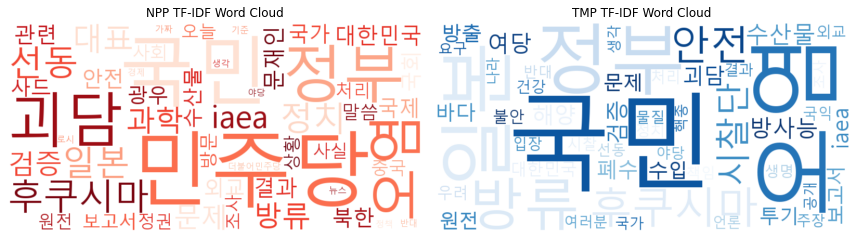

In [134]:
make_wordcloud(npp_yoon1,tmp_yoon1)

## 2. 이상민 장관 탄핵 소추 (이태원 참사)

NPP'S Top 100 Words with High TF-IDF Scores:
민주당: 0.1932
국민: 0.1308
정부: 0.0845
대표: 0.0796
탄핵: 0.0757
장관: 0.0719
국회: 0.0693
조사: 0.0648
국정: 0.0647
해임: 0.0570
예산안: 0.0529
참사: 0.0509
정치: 0.0502
소추: 0.0496
건의안: 0.0479
경찰: 0.0475
처리: 0.0472
이상민: 0.0453
민생: 0.0445
책임: 0.0442
예산: 0.0420
더불어민주당: 0.0409
방탄: 0.0401
수사: 0.0398
국가: 0.0365
문재인: 0.0364
이태원: 0.0363
북한: 0.0357
경제: 0.0349
대한민국: 0.0346
오늘: 0.0343
행정: 0.0337
상황: 0.0331
정쟁: 0.0325
합의: 0.0316
안전부: 0.0312
정권: 0.0299
검찰: 0.0283
말씀: 0.0281
관련: 0.0278
규명: 0.0266
노조: 0.0264
야당: 0.0264
안부: 0.0263
생각: 0.0260
요구: 0.0257
민노총: 0.0251
진상: 0.0249
문제: 0.0248
본회의: 0.0248
헌법: 0.0247
사람: 0.0247
주장: 0.0244
이번: 0.0244
불법: 0.0244
방송: 0.0243
사실: 0.0238
경찰국: 0.0237
시간: 0.0237
때문: 0.0234
대책: 0.0234
대선: 0.0232
정책: 0.0232
통과: 0.0230
위원장: 0.0224
법안: 0.0212
필요: 0.0212
사회: 0.0210
여야: 0.0209
발의: 0.0208
위기: 0.0206
사고: 0.0203
현장: 0.0202
피해: 0.0201
사건: 0.0201
인사: 0.0200
자신: 0.0199
회의: 0.0196
지원: 0.0196
결정: 0.0194
파업: 0.0194
재발: 0.0193
이상: 0.0191
행위: 0.0189
지금: 0.0188
mbc

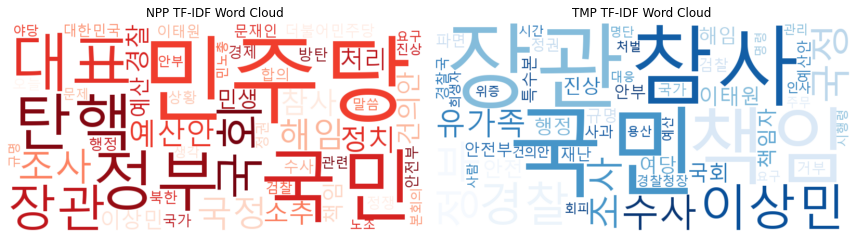

In [136]:
npp_yoon2 = yoon_2[yoon_2['target']=='국민의힘'].content2
tmp_yoon2 =yoon_2[yoon_2['target']=='민주당'].content2

make_wordcloud(npp_yoon2,tmp_yoon2)

# 문재인
1. 코로나 19 : ['백신', '접종', '확진', '의료', '마스크', '아동', '감염', '유치원', '보건', '환자']
2. 드루킹 사태 : ['국정원', '공작', '댓글', '대장동', '이명박', '루킹', '게이트', '압수수색', '문건', '구속']


In [137]:
moon.target.value_counts()

국민의힘    14126
민주당      9177
Name: target, dtype: int64

In [138]:
keywords_1 = ['백신', '접종', '확진', '의료', '마스크', '아동', '감염', '유치원', '보건', '환자']
keywords_2 = ['국정원', '공작', '댓글', '대장동', '이명박', '루킹', '게이트', '압수수색', '문건', '구속']

In [139]:
moon['content3'] = moon['content2'].str.split(" ")


In [140]:
moon_1 = moon[moon['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_1) >= 3)]
moon_2 = moon[moon['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_2) >= 3)]

print("1번 이슈에 관한",moon_1.shape[0],"개의 정당 간행물 발견")
print("2번 이슈에 관한",moon_2.shape[0],"개의 정당 간행물 발견")


1번 이슈에 관한 854 개의 정당 간행물 발견
2번 이슈에 관한 787 개의 정당 간행물 발견


In [141]:
print("1번 이슈(코로나19)에 관한 정당의 정당간행물 수")
print(moon_1.target.value_counts())

print()

print("2번 이슈(드루킹사태)에 관한 정당의 정당간행물 수")
print(moon_2.target.value_counts())

1번 이슈(코로나19)에 관한 정당의 정당간행물 수
국민의힘    499
민주당     355
Name: target, dtype: int64

2번 이슈(드루킹사태)에 관한 정당의 정당간행물 수
국민의힘    528
민주당     259
Name: target, dtype: int64


## 1. 코로나 19

NPP'S Top 100 Words with High TF-IDF Scores:
국민: 0.1540
백신: 0.1302
정부: 0.1243
코로나: 0.0804
방역: 0.0750
접종: 0.0709
문재인: 0.0599
민주당: 0.0480
확진: 0.0468
상황: 0.0467
정권: 0.0417
말씀: 0.0409
장관: 0.0406
대책: 0.0389
생각: 0.0380
정책: 0.0371
확보: 0.0370
문제: 0.0369
선거: 0.0358
사람: 0.0352
마스크: 0.0329
경제: 0.0324
사태: 0.0323
감염: 0.0314
국가: 0.0310
의료: 0.0304
여당: 0.0295
오늘: 0.0289
이번: 0.0289
정치: 0.0289
중국: 0.0285
대응: 0.0285
환자: 0.0279
때문: 0.0276
대한민국: 0.0271
책임: 0.0270
국회: 0.0257
예산: 0.0257
나라: 0.0256
관련: 0.0252
청와대: 0.0250
검찰: 0.0247
안전: 0.0245
의료진: 0.0243
지원: 0.0243
필요: 0.0242
북한: 0.0241
발생: 0.0238
위기: 0.0234
지역: 0.0233
사회: 0.0229
조치: 0.0228
지금: 0.0227
폐렴: 0.0225
보건: 0.0225
사실: 0.0224
확산: 0.0220
이상: 0.0217
수사: 0.0212
시장: 0.0209
집단: 0.0208
발표: 0.0200
야당: 0.0199
이야기: 0.0199
전문가: 0.0198
바이러스: 0.0195
시간: 0.0195
실패: 0.0193
사건: 0.0193
무능: 0.0192
시작: 0.0191
병상: 0.0191
여러분: 0.0190
세계: 0.0189
공급: 0.0188
거리: 0.0187
우리나라: 0.0186
인사: 0.0185
입국: 0.0184
두기: 0.0184
감사: 0.0182
당국: 0.0182
생명: 0.0181
우려: 0.0181
체계: 0.0180
불안: 0

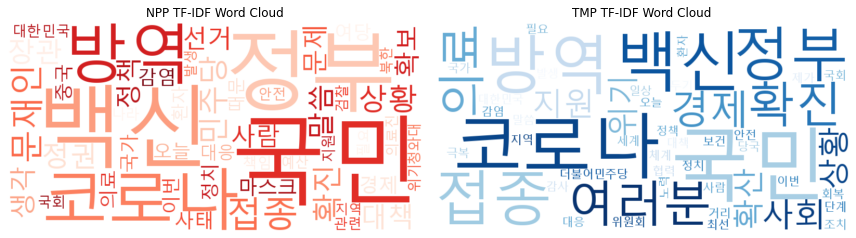

In [142]:
npp_moon_1 = moon_1[moon_1['target']=='국민의힘'].content2
tmp_moon_1 = moon_1[moon_1['target']=='민주당'].content2

make_wordcloud(npp_moon_1,tmp_moon_1)

## 2. 드루킹 사태

NPP'S Top 100 Words with High TF-IDF Scores:
국민: 0.1226
수사: 0.0856
정부: 0.0802
문재인: 0.0719
특검: 0.0694
민주당: 0.0694
정권: 0.0683
검찰: 0.0653
선거: 0.0525
대장동: 0.0500
말씀: 0.0492
사건: 0.0491
루킹: 0.0489
청와대: 0.0442
생각: 0.0423
사람: 0.0411
정치: 0.0393
의혹: 0.0389
김경수: 0.0385
조작: 0.0384
댓글: 0.0384
국회: 0.0380
조국: 0.0374
북한: 0.0373
게이트: 0.0359
경제: 0.0358
자유: 0.0353
지사: 0.0353
문제: 0.0346
경찰: 0.0344
사실: 0.0335
관련: 0.0333
대한민국: 0.0331
정책: 0.0320
조사: 0.0312
여론: 0.0307
한국당: 0.0303
오늘: 0.0286
장관: 0.0282
진실: 0.0280
대선: 0.0278
여당: 0.0277
공작: 0.0273
권력: 0.0272
압수수색: 0.0271
공수: 0.0264
상황: 0.0264
이번: 0.0258
언론: 0.0255
국가: 0.0246
야당: 0.0245
인사: 0.0245
국정: 0.0243
때문: 0.0241
시장: 0.0239
개발: 0.0238
이야기: 0.0233
대표: 0.0230
원전: 0.0218
내용: 0.0214
감사: 0.0208
여러분: 0.0207
나라: 0.0207
당시: 0.0206
구속: 0.0205
요구: 0.0205
제가: 0.0200
국정원: 0.0199
혐의: 0.0198
성남: 0.0195
부분: 0.0194
시간: 0.0193
개입: 0.0193
진상: 0.0190
증거: 0.0188
지금: 0.0187
방송: 0.0186
검사: 0.0186
책임: 0.0185
비리: 0.0183
울산: 0.0180
보도: 0.0180
핵심: 0.0180
사업: 0.0180
라고: 0.0178
이상: 0.

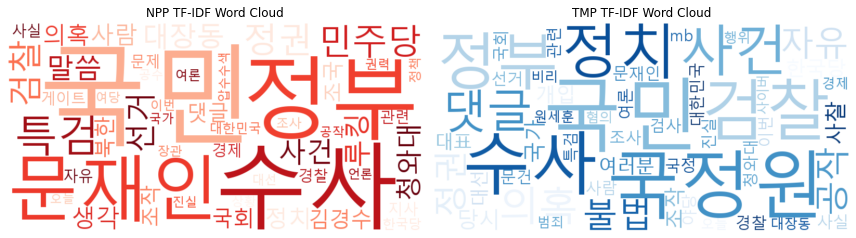

In [77]:
npp_moon_2 = moon_2[moon_2['target']=='국민의힘'].content2
tmp_moon_2 = moon_2[moon_2['target']=='민주당'].content2

make_wordcloud(npp_moon_2,tmp_moon_2)

# 박근혜
1. 국정교과서, 최순실 사태 : ['교과서', '최순', '총장', '해임', '출석', '교육부', '검사', '우병우', '김기춘', '증인']
2. 남북 갈등 협력 : ['아베', '유출', '사이버', '댓글', '이산가족', '상봉', 'NLL', '문란', '국기', '국정원장']


In [143]:
park.target.value_counts()

민주당     7421
국민의힘    5681
Name: target, dtype: int64

In [144]:
keywords_1 =  ['교과서', '최순', '총장', '해임', '출석', '교육부', '검사', '우병우', '김기춘', '증인']
keywords_2 = ['아베', '유출', '사이버', '댓글', '이산가족', '상봉', 'NLL', '문란', '국기', '국정원장']


In [145]:
park['content3'] = park['content2'].str.split(" ")


In [146]:
park_1 = park[park['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_1) >= 3)]
park_2 = park[park['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_2) >= 3)]

print("1번 이슈에 관한",moon_1.shape[0],"개의 정당 간행물 발견")
print("2번 이슈에 관한",moon_2.shape[0],"개의 정당 간행물 발견")

1번 이슈에 관한 854 개의 정당 간행물 발견
2번 이슈에 관한 787 개의 정당 간행물 발견


In [147]:
print("1번 이슈(코로나19)에 관한 정당의 정당간행물 수")
print(moon_1.target.value_counts())

print()

print("2번 이슈(드루킹사태)에 관한 정당의 정당간행물 수")
print(moon_2.target.value_counts())

1번 이슈(코로나19)에 관한 정당의 정당간행물 수
국민의힘    499
민주당     355
Name: target, dtype: int64

2번 이슈(드루킹사태)에 관한 정당의 정당간행물 수
국민의힘    528
민주당     259
Name: target, dtype: int64


## 1. 국정 교과서, 최순실 사태

NPP'S Top 100 Words with High TF-IDF Scores:
국민: 0.1027
민주당: 0.0811
국회: 0.0792
문제: 0.0740
정치: 0.0701
말씀: 0.0692
생각: 0.0687
교과서: 0.0673
야당: 0.0668
정부: 0.0632
경제: 0.0573
국정: 0.0558
대표: 0.0528
감사: 0.0489
역사: 0.0487
북한: 0.0474
세월호: 0.0450
때문: 0.0429
민생: 0.0428
관련: 0.0424
오늘: 0.0415
일본: 0.0402
위원회: 0.0397
법안: 0.0390
국감: 0.0387
국정원: 0.0381
수사: 0.0379
새누리당: 0.0376
개혁: 0.0365
탄핵: 0.0361
조사: 0.0358
이번: 0.0355
검찰: 0.0346
처리: 0.0342
특검: 0.0341
상황: 0.0335
합의: 0.0329
선거: 0.0324
정책: 0.0322
대한민국: 0.0319
예산: 0.0313
대선: 0.0311
부분: 0.0310
국가: 0.0310
사실: 0.0305
청문회: 0.0304
지역: 0.0302
시장: 0.0300
특위: 0.0289
증인: 0.0284
가지: 0.0278
여야: 0.0273
사람: 0.0273
제가: 0.0267
공무원: 0.0266
주장: 0.0265
연금: 0.0261
책임: 0.0259
사건: 0.0258
이야기: 0.0255
내용: 0.0254
필요: 0.0252
편향: 0.0249
요구: 0.0241
연합: 0.0239
대책: 0.0238
헌법: 0.0234
위원: 0.0231
회의: 0.0226
문재인: 0.0226
해주시: 0.0224
해임: 0.0223
장관: 0.0223
민주: 0.0223
시간: 0.0222
논의: 0.0222
검사: 0.0220
적극: 0.0220
경우: 0.0219
지원: 0.0217
노력: 0.0216
교육: 0.0215
원내대표: 0.0213
결과: 0.0213
활성: 0.0212
정당: 

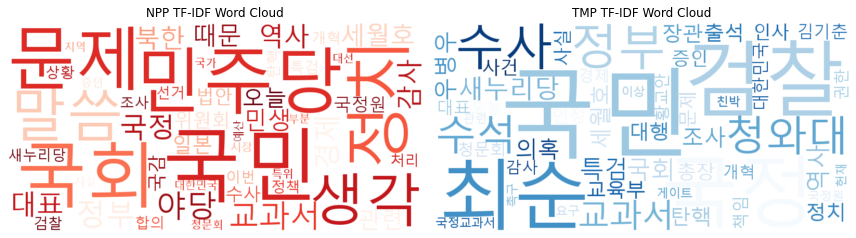

In [148]:
npp_park_1 = park_1[park_1['target']=='국민의힘'].content2
tmp_park_1 = park_1[park_1['target']=='민주당'].content2

make_wordcloud(npp_park_1,tmp_park_1)



## 2. 남북갈등협력

NPP'S Top 100 Words with High TF-IDF Scores:
민주당: 0.1195
국민: 0.1173
북한: 0.0850
정부: 0.0818
국회: 0.0806
국정원: 0.0777
정치: 0.0766
문제: 0.0648
생각: 0.0634
말씀: 0.0598
관련: 0.0543
검찰: 0.0538
일본: 0.0517
국정: 0.0488
선거: 0.0471
경제: 0.0450
이번: 0.0438
조사: 0.0434
야당: 0.0415
수사: 0.0414
민생: 0.0410
법안: 0.0410
사건: 0.0408
대선: 0.0400
새누리당: 0.0376
대화: 0.0358
국가: 0.0355
남북: 0.0353
대표: 0.0350
이산가족: 0.0347
오늘: 0.0342
때문: 0.0338
여야: 0.0338
상황: 0.0337
상봉: 0.0336
처리: 0.0334
개혁: 0.0330
정책: 0.0318
공천: 0.0313
위원회: 0.0308
지역: 0.0302
사실: 0.0294
문재인: 0.0293
nll: 0.0292
지방: 0.0289
대한민국: 0.0289
의혹: 0.0288
주장: 0.0286
역사: 0.0285
필요: 0.0284
발언: 0.0277
회담: 0.0275
연금: 0.0275
책임: 0.0272
기초: 0.0267
관계: 0.0260
특위: 0.0257
결과: 0.0257
감사: 0.0257
인권: 0.0254
예산: 0.0252
피해: 0.0252
대책: 0.0247
노력: 0.0246
유출: 0.0244
사고: 0.0244
정당: 0.0239
댓글: 0.0238
요구: 0.0237
합의: 0.0237
지원: 0.0236
정보: 0.0234
회의: 0.0232
공개: 0.0231
마련: 0.0231
안보: 0.0231
위원: 0.0230
사회: 0.0228
내용: 0.0226
적극: 0.0225
아베: 0.0225
안철수: 0.0220
가지: 0.0212
안전: 0.0211
예정: 0.0210
투쟁: 0.02

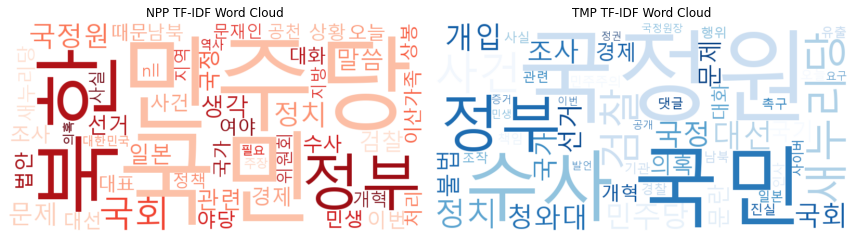

In [149]:
npp_park_2 = park_2[park_2['target']=='국민의힘'].content2
tmp_park_2 = park_2[park_2['target']=='민주당'].content2

make_wordcloud(npp_park_2,tmp_park_2)

# 이명박
1. 양극화 극복 : ['세종', '비정규직', '노동자', '도시', '노동', '노조', '정운찬', '원안', '충청', '균형발전']
2. 자원 외교 : ['대기업', '규제', '투자', '물가', '업체', '수출', '은행', '원전', '국내', '유통']



In [150]:
lee.target.value_counts()

민주당     12140
국민의힘     9648
Name: target, dtype: int64

In [151]:
keywords_1 =  ['세종', '비정규직', '노동자', '도시', '노동', '노조', '정운찬', '원안', '충청', '균형발전']
keywords_2 =  ['대기업', '규제', '투자', '물가', '업체', '수출', '은행', '원전', '국내', '유통']



In [152]:
lee['content3'] = lee['content2'].str.split(" ")

lee_1 = lee[lee['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_1) >= 3)]
lee_2 = lee[lee['content3'].apply(lambda text_list: sum(keyword in text_list for keyword in keywords_2) >= 3)]

print("1번 이슈에 관한",lee_1.shape[0],"개의 정당 간행물 발견")
print("2번 이슈에 관한",lee_2.shape[0],"개의 정당 간행물 발견")

print("1번 이슈(코로나19)에 관한 정당의 정당간행물 수")
print(lee_1.target.value_counts())

print()

print("2번 이슈(드루킹사태)에 관한 정당의 정당간행물 수")
print(lee_2.target.value_counts())

1번 이슈에 관한 727 개의 정당 간행물 발견
2번 이슈에 관한 632 개의 정당 간행물 발견
1번 이슈(코로나19)에 관한 정당의 정당간행물 수
민주당     499
국민의힘    228
Name: target, dtype: int64

2번 이슈(드루킹사태)에 관한 정당의 정당간행물 수
국민의힘    323
민주당     309
Name: target, dtype: int64


## 1. 양극화 극복

NPP'S Top 100 Words with High TF-IDF Scores:
말씀: 0.0921
국민: 0.0879
문제: 0.0838
생각: 0.0834
세종: 0.0732
국회: 0.0711
정부: 0.0710
민주당: 0.0600
때문: 0.0481
정치: 0.0464
지역: 0.0409
정책: 0.0400
비정규직: 0.0388
법안: 0.0385
경제: 0.0385
선거: 0.0371
예산: 0.0370
오늘: 0.0369
위원회: 0.0365
대표: 0.0364
관련: 0.0356
처리: 0.0354
이번: 0.0352
부분: 0.0348
사업: 0.0339
가지: 0.0331
야당: 0.0331
노조: 0.0326
제가: 0.0321
위원장: 0.0313
국가: 0.0304
노동: 0.0299
충청: 0.0297
위원: 0.0288
발전: 0.0286
대한민국: 0.0279
최고: 0.0276
지원: 0.0276
필요: 0.0274
총리: 0.0268
북한: 0.0268
회의: 0.0266
사람: 0.0265
서민: 0.0265
지방: 0.0264
새누리당: 0.0263
추진: 0.0254
사회: 0.0251
합의: 0.0250
약속: 0.0248
논의: 0.0248
대책: 0.0248
얘기: 0.0245
노력: 0.0244
국정: 0.0235
사실: 0.0231
조사: 0.0224
도시: 0.0224
상황: 0.0222
경우: 0.0219
내용: 0.0217
이야기: 0.0215
원안: 0.0213
반대: 0.0207
노동자: 0.0207
결정: 0.0205
의견: 0.0203
정권: 0.0202
나라: 0.0199
문재인: 0.0199
통합: 0.0198
통과: 0.0197
기업: 0.0197
위기: 0.0196
해주시: 0.0196
상임위: 0.0196
민생: 0.0195
계획: 0.0195
정도: 0.0195
투표: 0.0194
주장: 0.0193
제도: 0.0191
감사: 0.0190
노사: 0.0189
여러분: 0.0186
발표: 0

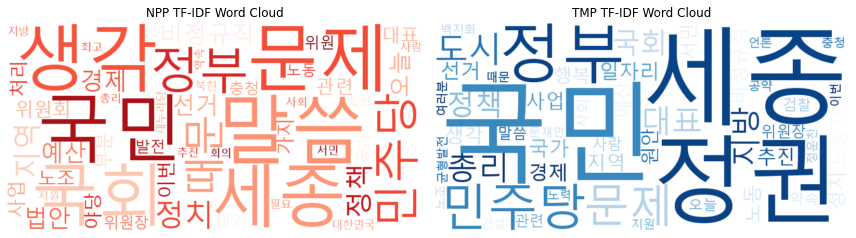

In [153]:
npp_lee_1 = lee_1[lee_1['target']=='국민의힘'].content2
tmp_lee_1 = lee_1[lee_1['target']=='민주당'].content2

make_wordcloud(npp_lee_1,tmp_lee_1)

## 2. 자원 외교

NPP'S Top 100 Words with High TF-IDF Scores:
생각: 0.0966
말씀: 0.0915
문제: 0.0857
국민: 0.0845
정부: 0.0815
국회: 0.0703
경제: 0.0692
때문: 0.0590
민주당: 0.0586
정책: 0.0548
fta: 0.0443
법안: 0.0430
대책: 0.0427
오늘: 0.0423
이번: 0.0407
정치: 0.0394
가지: 0.0390
처리: 0.0388
부분: 0.0373
대표: 0.0370
관련: 0.0368
서민: 0.0363
지원: 0.0355
중소기업: 0.0355
예산: 0.0352
선거: 0.0352
지역: 0.0341
필요: 0.0336
야당: 0.0335
위원회: 0.0326
금융: 0.0321
노력: 0.0312
국가: 0.0310
위원: 0.0307
북한: 0.0305
위기: 0.0304
최고: 0.0302
사업: 0.0301
제가: 0.0298
상황: 0.0297
지방: 0.0293
시장: 0.0292
기업: 0.0289
회의: 0.0280
대기업: 0.0275
사람: 0.0273
미국: 0.0271
사실: 0.0268
합의: 0.0264
국정: 0.0263
감사: 0.0262
경우: 0.0257
내용: 0.0253
제도: 0.0248
은행: 0.0243
논의: 0.0242
사회: 0.0237
해주시: 0.0234
얘기: 0.0233
추진: 0.0232
마련: 0.0232
복지: 0.0230
산업: 0.0228
세계: 0.0227
국감: 0.0226
정도: 0.0226
위원장: 0.0224
발전: 0.0222
일자리: 0.0222
이야기: 0.0219
투자: 0.0213
발표: 0.0213
수출: 0.0209
의견: 0.0209
입장: 0.0208
정당: 0.0208
적극: 0.0208
민생: 0.0206
원내대표: 0.0206
조사: 0.0205
그동안: 0.0199
성장: 0.0199
우리나라: 0.0198
요구: 0.0197
주장: 0.0197
개혁: 0

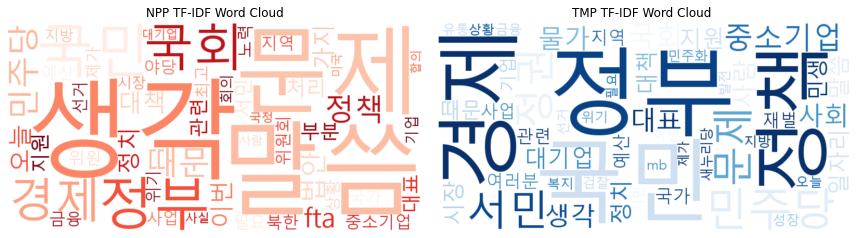

In [154]:
npp_lee_2 = lee_2[lee_2['target']=='국민의힘'].content2
tmp_lee_2 = lee_2[lee_2['target']=='민주당'].content2

make_wordcloud(npp_lee_2,tmp_lee_2)